In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

c:\Users\Nadeem\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


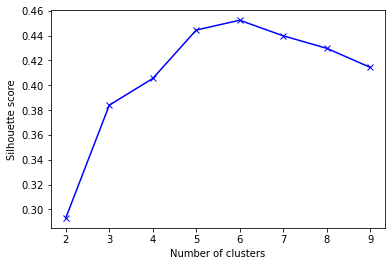

The optimal number of clusters is 6


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

range_n_clusters = range(2, 10)

silhouette_scores = []

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    silhouette_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_n_clusters}")

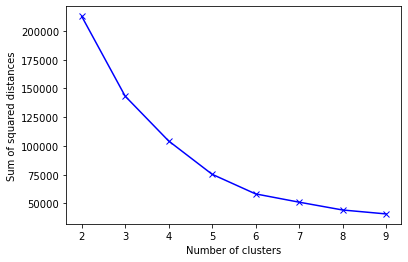

The optimal number of clusters is 3


In [6]:
sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    
    clusterer.fit(X)
    
    sum_of_squared_distances.append(clusterer.inertia_)

plt.plot(range_n_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

elbow_index = np.argmin(np.diff(sum_of_squared_distances)) + 1
optimal_n_clusters = range_n_clusters[elbow_index]
print(f"The optimal number of clusters is {optimal_n_clusters}")

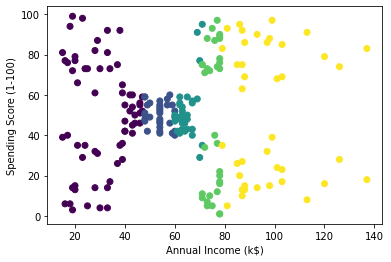

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

n_clusters = 5

clusters = [{i} for i in range(len(X))]

def distance(cluster1, cluster2):
    return np.sqrt(np.sum((np.mean(list(cluster1), axis=0) - np.mean(list(cluster2), axis=0)) ** 2))

def find_closest_clusters(clusters):
    closest_distance = float('inf')
    closest_pair = None
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dist = distance(clusters[i], clusters[j])
            if dist < closest_distance:
                closest_distance = dist
                closest_pair = (i, j)
    return closest_pair

while len(clusters) > n_clusters:
    i, j = find_closest_clusters(clusters)
    clusters[i] |= clusters[j]
    del clusters[j]

labels = np.zeros(len(X))
for i, cluster in enumerate(clusters):
    for point in cluster:
        labels[point] = i

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

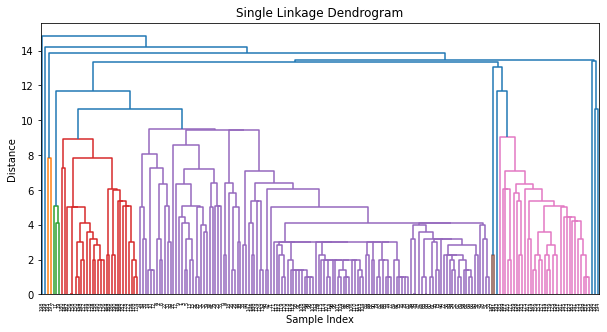

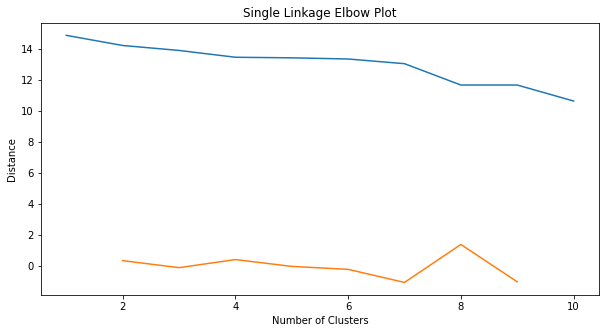

Optimal number of clusters for Single linkage: 8



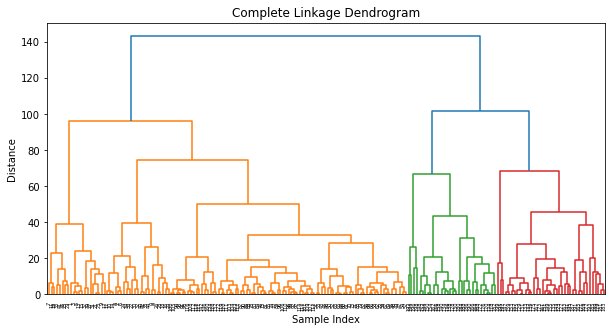

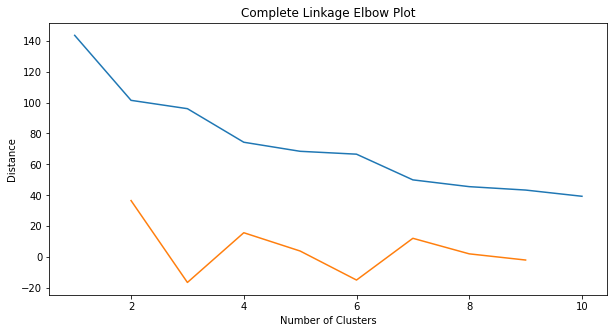

Optimal number of clusters for Complete linkage: 2



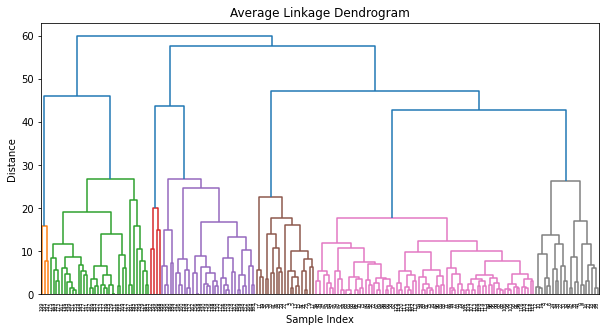

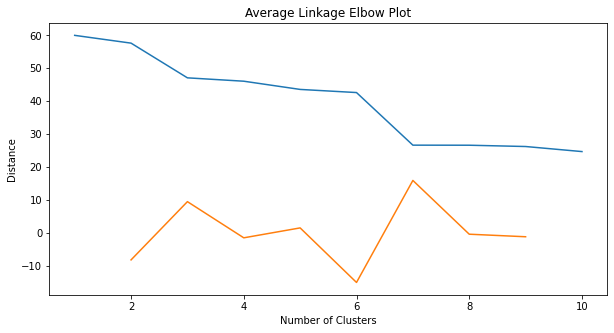

Optimal number of clusters for Average linkage: 7



In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

linkage_methods = ['single', 'complete', 'average']

for method in linkage_methods:
    Z = linkage(X, method)

    plt.figure(figsize=(10, 5))
    plt.title(f'{method.capitalize()} Linkage Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(Z)
    plt.show()

    last = Z[-10:, 2]
    last_rev = last[::-1]
    idxs = np.arange(1, len(last) + 1)
    plt.figure(figsize=(10, 5))
    plt.title(f'{method.capitalize()} Linkage Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distance')
    plt.plot(idxs, last_rev)

    acceleration = np.diff(last, 2)  # 2nd derivative of the distances
    acceleration_rev = acceleration[::-1]
    plt.plot(idxs[:-2] + 1, acceleration_rev)
    plt.show()

    k = acceleration_rev.argmax() + 2
    print(f'Optimal number of clusters for {method.capitalize()} linkage: {k}\n')

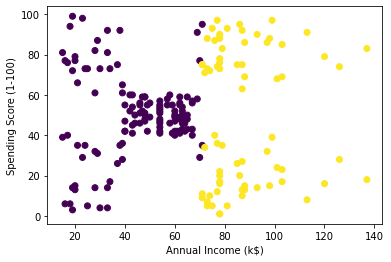

In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

n_clusters = 2

clusters = [{i} for i in range(len(X))]

while len(clusters) > n_clusters:
    i, j = find_closest_clusters(clusters)
    clusters[i] |= clusters[j]
    del clusters[j]

labels = np.zeros(len(X))
for i, cluster in enumerate(clusters):
    for point in cluster:
        labels[point] = i

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

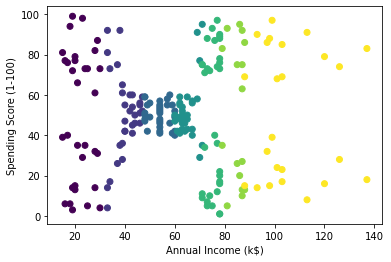

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

n_clusters = 7

clusters = [{i} for i in range(len(X))]

while len(clusters) > n_clusters:
    i, j = find_closest_clusters(clusters)
    clusters[i] |= clusters[j]
    del clusters[j]

labels = np.zeros(len(X))
for i, cluster in enumerate(clusters):
    for point in cluster:
        labels[point] = i

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

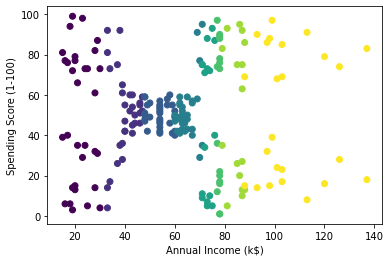

In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

n_clusters = 8

clusters = [{i} for i in range(len(X))]

while len(clusters) > n_clusters:
    i, j = find_closest_clusters(clusters)
    clusters[i] |= clusters[j]
    del clusters[j]

labels = np.zeros(len(X))
for i, cluster in enumerate(clusters):
    for point in cluster:
        labels[point] = i

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()